In [126]:
import pandas as pd
import math
import matplotlib.pyplot as plt

# Teste A/B

In [127]:
pd.read_csv('dados_sexto_dia/ab_data.csv')

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [128]:
dados = pd.read_csv('dados_sexto_dia/ab_data.csv')

In [129]:
dados.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

In [130]:
dados['timestamp'] = pd.to_datetime(dados['timestamp'])

In [131]:
dados.dtypes

user_id                  int64
timestamp       datetime64[ns]
group                   object
landing_page            object
converted                int64
dtype: object

In [132]:
old_page = dados[dados['landing_page']=='old_page']\
.groupby(pd.Grouper(key='timestamp',freq='D')).sum()['converted']
old_page = pd.DataFrame(old_page)

In [133]:
new_page = dados[dados['landing_page']=='new_page']\
.groupby(pd.Grouper(key='timestamp',freq='D')).sum()['converted']
new_page = pd.DataFrame(new_page)

In [134]:
diferenca = new_page - old_page

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


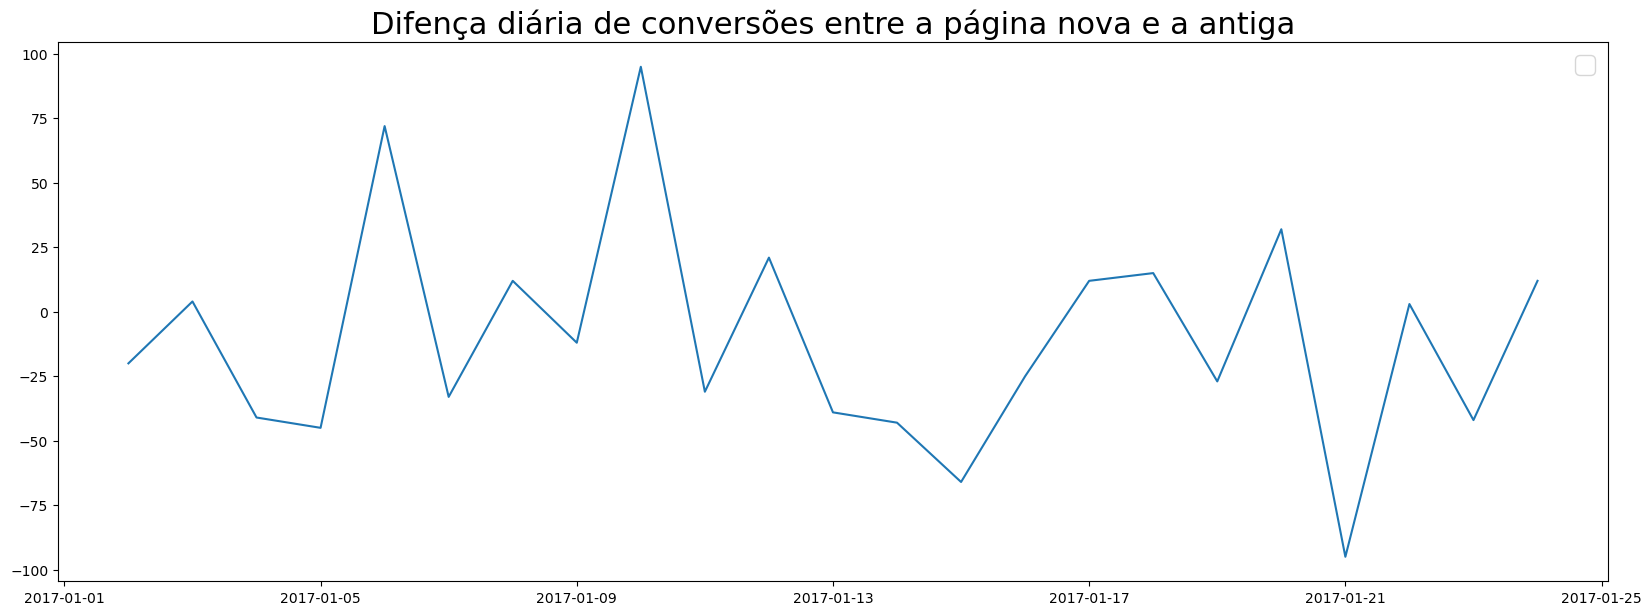

In [135]:
plt.figure(figsize=(20,7))
plt.plot(diferenca)
plt.title('Difença diária de conversões entre a página nova e a antiga', fontsize=22)
plt.legend(fontsize=18)

### CONCLUSÃO
Analisando o gráfico obtido, suspeita-se que caso exista alguma diferença entre as quantidades de conversões, esse diferença seja proveniente de um comportamento ocilatório.

Um segunda opção, séria fazer uma coleta de dados experimentais por um período de tempo maior.

## Total de dados coletados

In [136]:
dados['landing_page'].value_counts(normalize=True)

old_page    0.5
new_page    0.5
Name: landing_page, dtype: float64

In [137]:
dados['landing_page'].value_counts()

old_page    147239
new_page    147239
Name: landing_page, dtype: int64

## Vendas convertidas na página antiga

In [138]:
old_page = dados[dados['landing_page'] == 'old_page']['converted']
old_page.value_counts(normalize=True)

0    0.879522
1    0.120478
Name: converted, dtype: float64

In [139]:
old_page = dados[dados['landing_page'] == 'old_page']['converted']
old_page.value_counts()

0    129500
1     17739
Name: converted, dtype: int64

## Vendas convertidas na página nova

In [140]:
new_page = dados[dados['landing_page'] == 'new_page']['converted']
new_page.value_counts(normalize=True)

0    0.881159
1    0.118841
Name: converted, dtype: float64

In [141]:
new_page = dados[dados['landing_page'] == 'new_page']['converted']
new_page.value_counts()

0    129741
1     17498
Name: converted, dtype: int64

# Aplicação de teste A/B

In [142]:
new_page.value_counts()[1] - old_page.value_counts()[1] 

-241

Nota-se que ouve uma queda na quantidade de conversões da página antiga para a página nova.

O teste de hipótese realizado, verifica se essa diferença possue valor estatístico significativo.

A hipótese nula afirma que quantidade de conversões na página antiga é igual a quantidade de conversões na página nova.

In [143]:
def normal_cdf(x:float,mu:float=0,sigma:float=1):
    return (1+math.erf((x-mu)/math.sqrt(2)/sigma))/2
def normal_probality_below(x:float,mu:float=0,sigma:float=1):
    return normal_cdf(x,mu,sigma)
def normal_probality_above(lo:float,mu:float=0,sigma:float=1):
    return 1-normal_cdf(lo,mu,sigma)
def tow_sided_p_value(x:float,mu:float=0,sigma:float=1):
    if x>=mu:
        return 2*normal_probality_above(x,mu,sigma)
    else:
        return 2*normal_probality_below(x,mu,sigma)

In [144]:
def estimated_parameters(N,n):
    p = n/N
    sigma = math.sqrt(p*(1-p)/N)
    return p, sigma
def a_b_test_statistic(N_a,n_a,N_b,n_b):
    p_a,sigma_a = estimated_parameters(N_a,n_a)
    p_b,sigma_b = estimated_parameters(N_b,n_b)
    return (p_b-p_a)/math.sqrt(sigma_a**2+sigma_b**2)

In [145]:
N_a = dados['landing_page'].value_counts()[0]  # old_page
print(f'N_a = {N_a} (Quantidade de vizualições na página antiga)')
N_b = dados['landing_page'].value_counts()[1]  # new_page
print(f'N_b = {N_b} (Quantidade de vizualições na página nova)')
n_a = old_page.value_counts()[1]
print(f'n_a = {n_a} (Quantidade de convertidos na página antiga)')
n_b = new_page.value_counts()[1]
print(f'n_b = {n_b} (Quantidade de convertidos na página nova)')

N_a = 147239 (Quantidade de vizualições na página antiga)
N_b = 147239 (Quantidade de vizualições na página nova)
n_a = 17739 (Quantidade de convertidos na página antiga)
n_b = 17498 (Quantidade de convertidos na página nova)


In [146]:
z = a_b_test_statistic(N_a,n_a,N_b,n_b)
z

-1.368338490064514

In [147]:
tow_sided_p_value(z)

0.17120614808294943

### CONCLUSÃO
Considerando um valor de significancia igual a 5%, aceita-se a hipótese nula afirmando que a diferença encontrada nos dados não possui valor estatístico significativo.